In [1]:
!pip install pytesseract

In [2]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,180 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

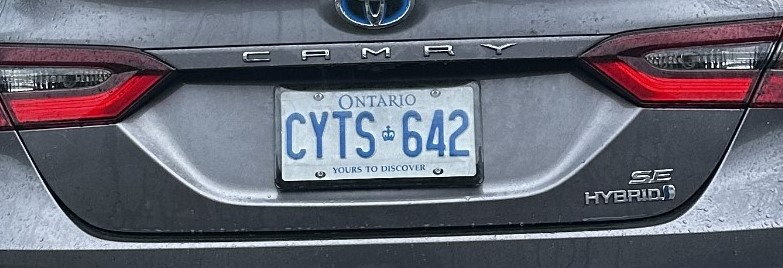

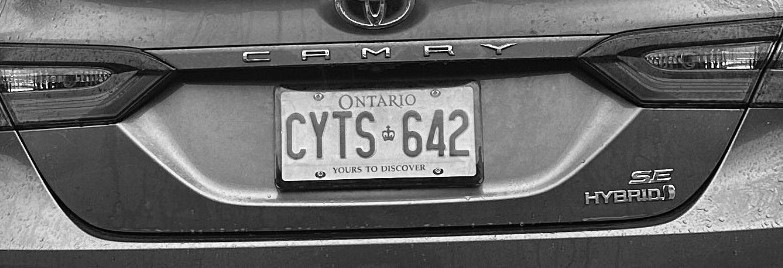

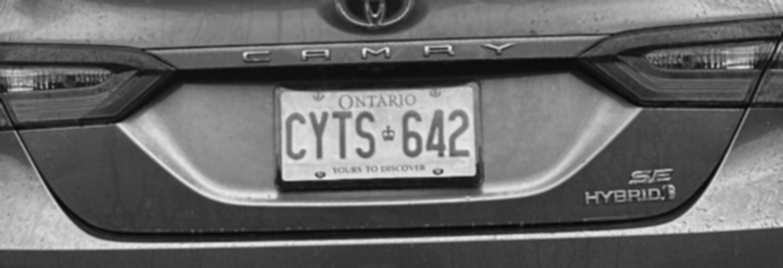

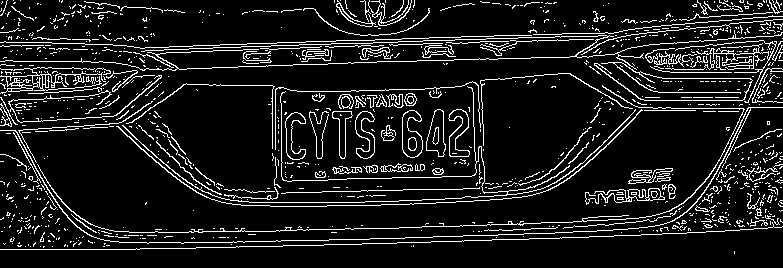

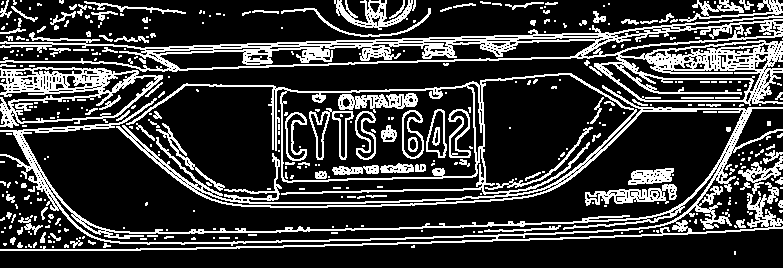

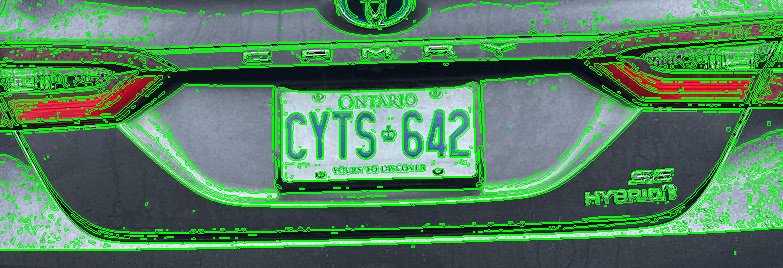

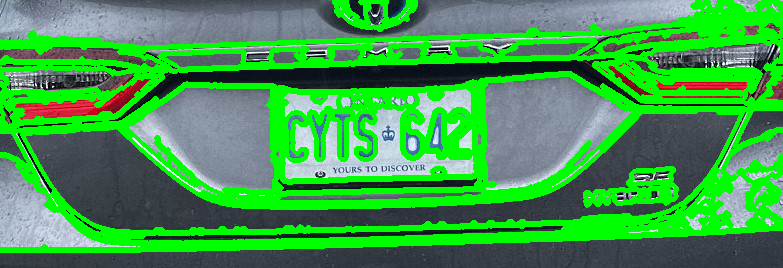

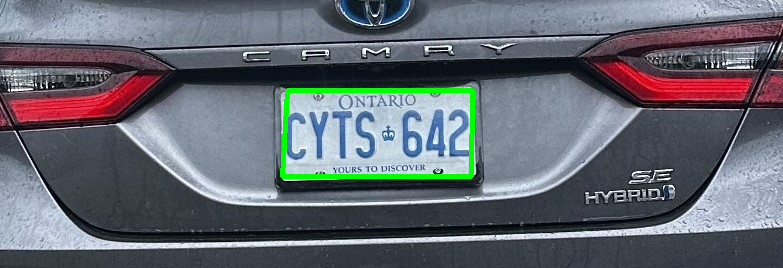

ONTARIO @
AVTC.f

CYTS642

YOURS TO DISCOV gy

 



In [6]:
import cv2
import imutils
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('Screenshot 2024-04-17 215620.jpg')

# image = imutils.resize(image, height=500, width=500)

cv2_imshow(image)
# cv2.waitKey(0)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
# cv2.waitKey(0)

gray = cv2.GaussianBlur(gray,(5,5),0)
cv2_imshow(gray)
# cv2.waitKey(0)

# gray = cv2.bilateralFilter(gray, 101, 17, 17)
# cv2_imshow(gray)
# # cv2.waitKey(0)

edged = cv2.Canny(gray, 60, 60)
cv2_imshow(edged)
# cv2.waitKey(0)

kernel = np.ones((2, 2), np.uint8)  # Create a kernel for dilation. You can adjust the size for different results.
dilated = cv2.dilate(edged, kernel, iterations=1)  # Increase the number of iterations for a more pronounced effect.
cv2_imshow(dilated)


cnts, new = cv2.findContours(dilated.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image1 = image.copy()
cv2.drawContours(image1, cnts, -1, (0, 255, 0))
cv2_imshow(image1)
# cv2.waitKey(0)

cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
NumberPlateCount = None

image2 = image.copy()
cv2.drawContours(image2, cnts, -1, (0,255,0),3)
cv2_imshow(image2)
# cv2.waitKey(0)

count = 0
name = 1

for i in cnts:
  perimeter = cv2.arcLength(i, True)
  approx = cv2.approxPolyDP(i, 0.02*perimeter, True)
  if (len(approx) == 4):
    NumberPlateCount = approx
    x, y, w, h = cv2.boundingRect(i)
    crop_image = image[y:y+h, x:x+w]
    cv2.imwrite(str(name)+ '.png', crop_image)
    name += 1

    break
cv2.drawContours(image, [NumberPlateCount], -1, (0,255,0),3)
cv2_imshow(image)
# cv2.waitKey(0)

# Configuration for tesseract
config = ('-l eng --oem 1 --psm 3')

# Run tesseract OCR on image
text = pytesseract.image_to_string('1.png', config=config)

# Print recognized text
print(text)

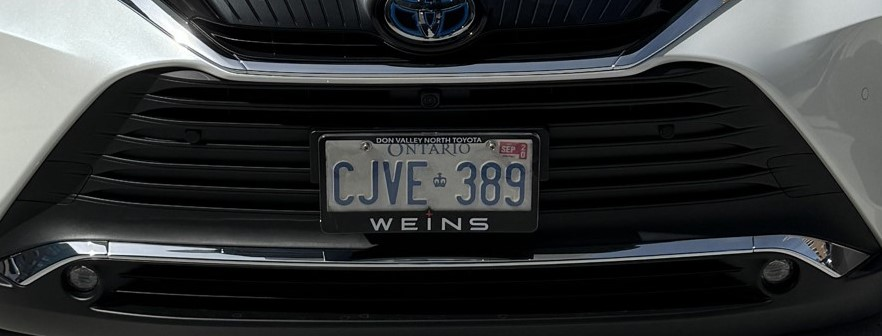

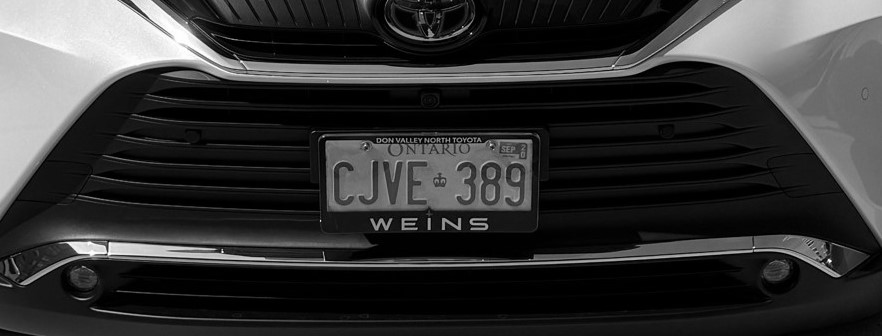

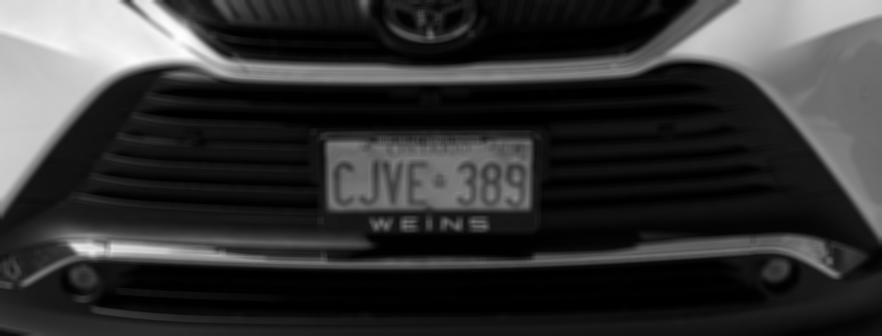

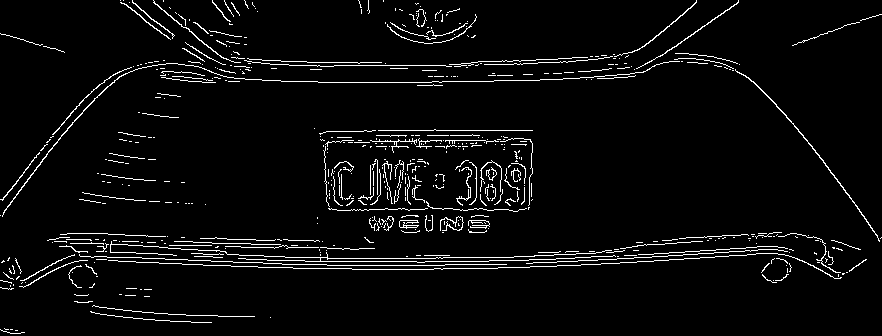

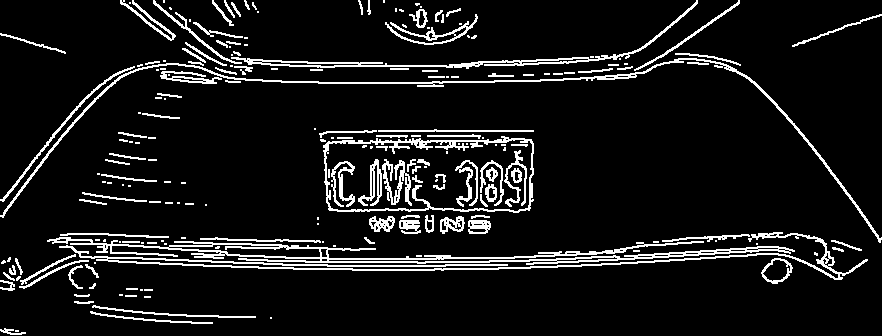

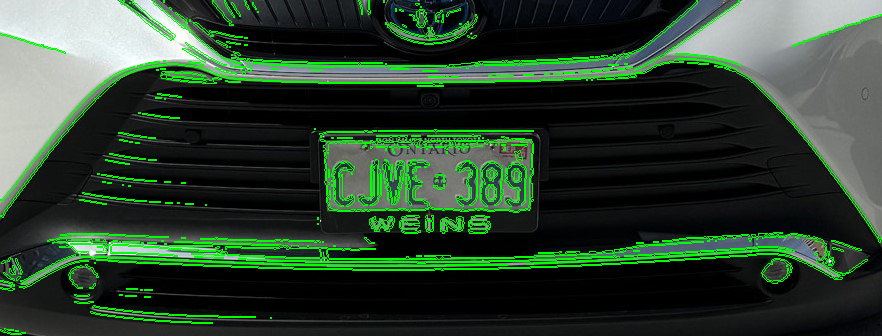

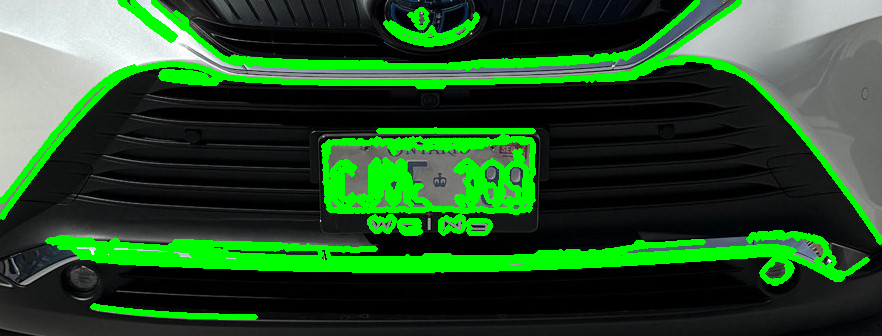

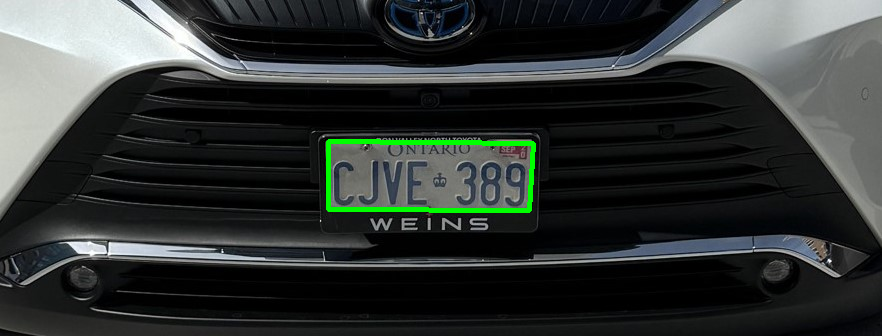

In [13]:
import cv2
import imutils
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('Screenshot 2024-04-17 223624.jpg')

# image = imutils.resize(image, height=500, width=500)

cv2_imshow(image)
# cv2.waitKey(0)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
# cv2.waitKey(0)

gray = cv2.GaussianBlur(gray,(7,7),10)
cv2_imshow(gray)
# cv2.waitKey(0)

# gray = cv2.bilateralFilter(gray, 101, 17, 17)
# cv2_imshow(gray)
# # cv2.waitKey(0)

edged = cv2.Canny(gray, 60, 60)
cv2_imshow(edged)
# cv2.waitKey(0)

kernel = np.ones((2, 2), np.uint8)  # Create a kernel for dilation. You can adjust the size for different results.
dilated = cv2.dilate(edged, kernel, iterations=1)  # Increase the number of iterations for a more pronounced effect.
cv2_imshow(dilated)


cnts, new = cv2.findContours(dilated.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image1 = image.copy()
cv2.drawContours(image1, cnts, -1, (0, 255, 0))
cv2_imshow(image1)
# cv2.waitKey(0)

cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
NumberPlateCount = None

image2 = image.copy()
cv2.drawContours(image2, cnts, -1, (0,255,0),3)
cv2_imshow(image2)
# cv2.waitKey(0)

count = 0
name = 1

for i in cnts:
  perimeter = cv2.arcLength(i, True)
  approx = cv2.approxPolyDP(i, 0.02*perimeter, True)
  if (len(approx) == 4):
    NumberPlateCount = approx
    x, y, w, h = cv2.boundingRect(i)
    crop_image = image[y:y+h, x:x+w]
    cv2.imwrite(str(name)+ '.png', crop_image)
    name += 1

    break
cv2.drawContours(image, [NumberPlateCount], -1, (0,255,0),3)
cv2_imshow(image)
# cv2.waitKey(0)

# Configuration for tesseract
config = ('-l eng --oem 1 --psm 3')

# Run tesseract OCR on image
text = pytesseract.image_to_string('1.png', config=config)

# Print recognized text
print(text)

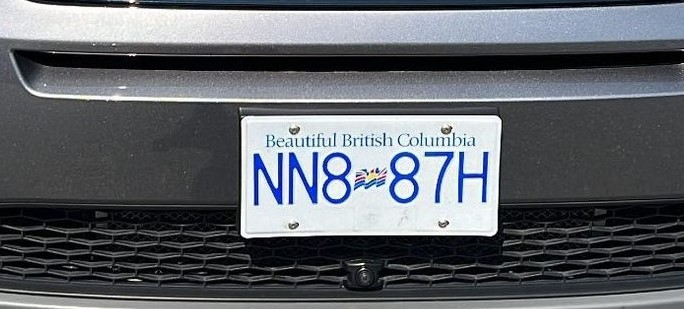

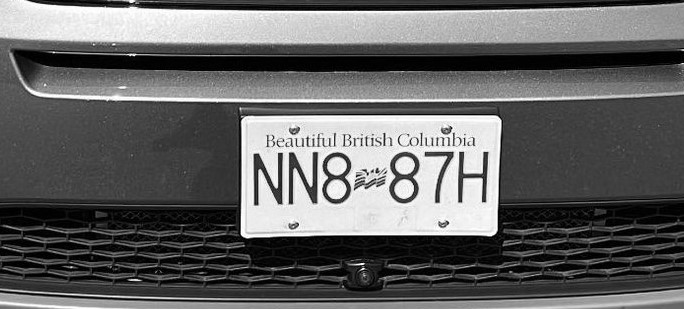

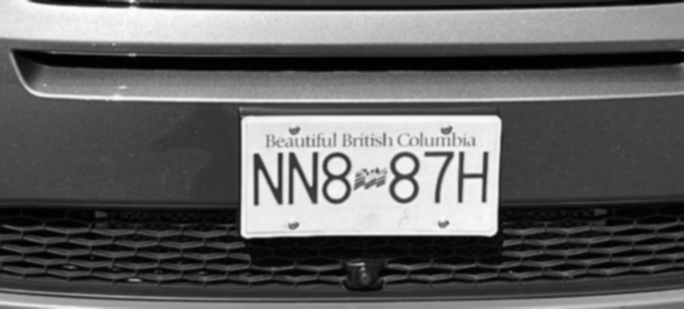

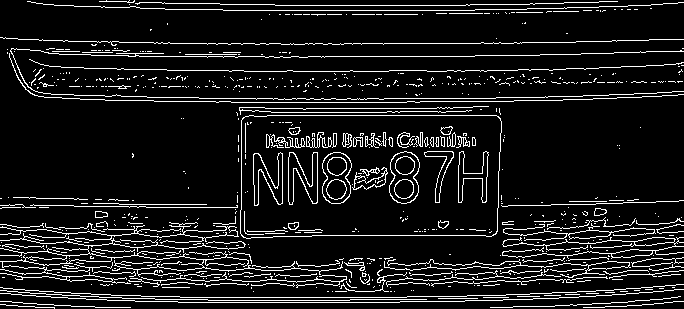

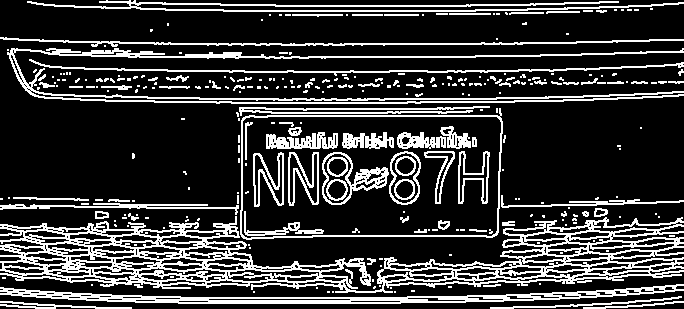

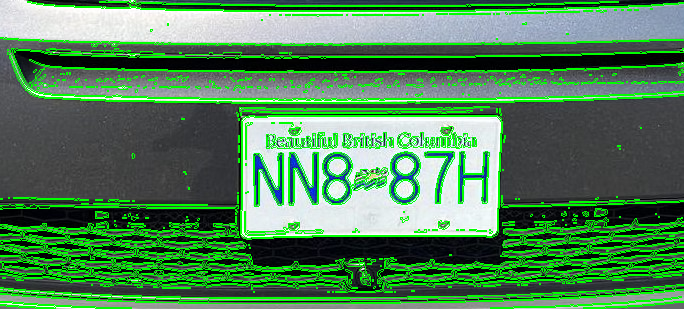

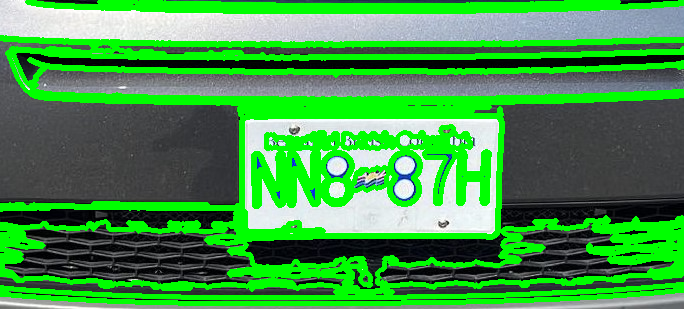

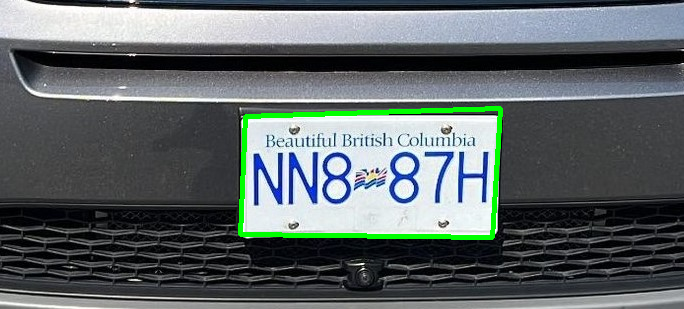

@ ae:
Beautiful British Columbia

 



In [33]:
import cv2
import imutils
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('BC2.jpg')

# image = imutils.resize(image, height=500, width=500)

cv2_imshow(image)
# cv2.waitKey(0)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
# cv2.waitKey(0)

gray = cv2.GaussianBlur(gray,(5,5),0)
cv2_imshow(gray)
# cv2.waitKey(0)

# gray = cv2.bilateralFilter(gray, 101, 17, 17)
# cv2_imshow(gray)
# # cv2.waitKey(0)

edged = cv2.Canny(gray, 60, 60)
cv2_imshow(edged)
# cv2.waitKey(0)

kernel = np.ones((2, 2), np.uint8)  # Create a kernel for dilation. You can adjust the size for different results.
dilated = cv2.dilate(edged, kernel, iterations=1)  # Increase the number of iterations for a more pronounced effect.
cv2_imshow(dilated)


cnts, new = cv2.findContours(dilated.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image1 = image.copy()
cv2.drawContours(image1, cnts, -1, (0, 255, 0))
cv2_imshow(image1)
# cv2.waitKey(0)

cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
NumberPlateCount = None

image2 = image.copy()
cv2.drawContours(image2, cnts, -1, (0,255,0),3)
cv2_imshow(image2)
# cv2.waitKey(0)

count = 0
name = 1

for i in cnts:
  perimeter = cv2.arcLength(i, True)
  approx = cv2.approxPolyDP(i, 0.02*perimeter, True)
  if (len(approx) == 4):
    NumberPlateCount = approx
    x, y, w, h = cv2.boundingRect(i)
    crop_image = image[y:y+h, x:x+w]
    cv2.imwrite(str(name)+ '.png', crop_image)
    name += 1

    break
cv2.drawContours(image, [NumberPlateCount], -1, (0,255,0),3)
cv2_imshow(image)
# cv2.waitKey(0)

# Configuration for tesseract
config = ('-l eng --oem 1 --psm 3')

# Run tesseract OCR on image
text = pytesseract.image_to_string('1.png', config=config)

# Print recognized text
print(text)